In [1]:
""" Stochastic Dominance Analysis for the Party Problem using
    RiskDeal Class and is1SD & is2SD functions """
from DecisionAnalysisPy import RiskDeal
from DecisionAnalysisPy import plot_risk_profiles, is1SD, is2SD

In [2]:
# Create the 3 risky deals
ID = RiskDeal(p=[0.4, 0.6], 
              x=[40,  50], 
              states=['sunny','rainy'],
              name='Indoors')

PR = RiskDeal(p=[0.4, 0.6],
              x=[90,  20], 
              states=['sunny','rainy'],
              name='Porch')

OD = RiskDeal(p=[0.4, 0.6], 
              x=[100, 0], 
              states=['sunny','rainy'],
              name='Outdoors')

In [3]:
# Parameters for plotting and checking stochastic domminance
plot_range=(-10, 110, 10)
npoints = 1000


Risk Profiles for Indoors:


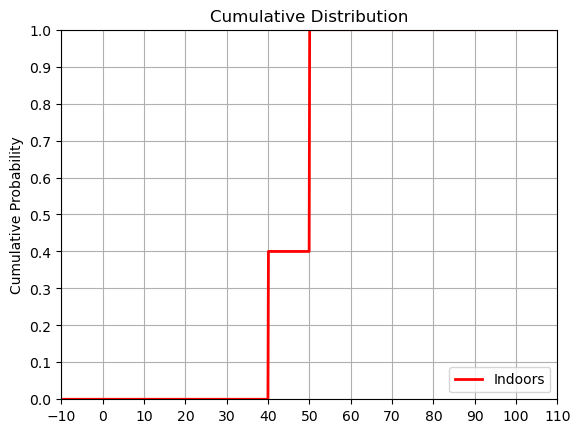

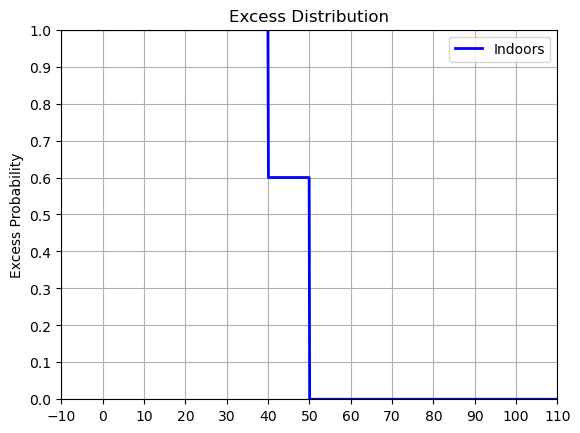


Risk Profiles for Porch:


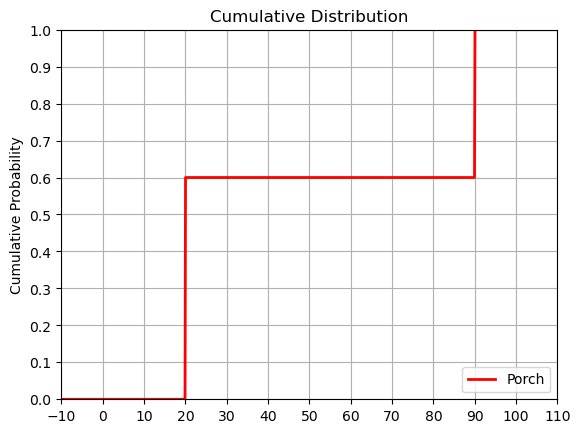

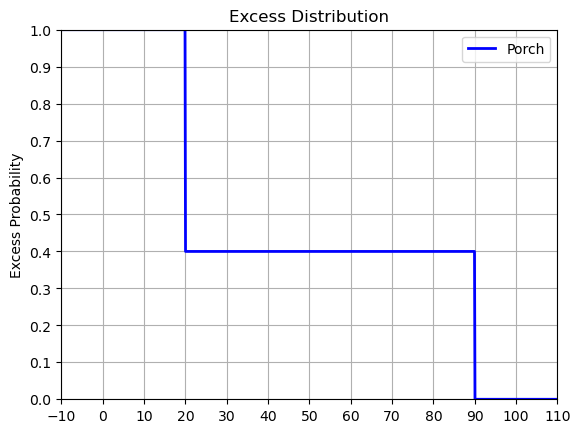


Risk Profiles for Outdoors:


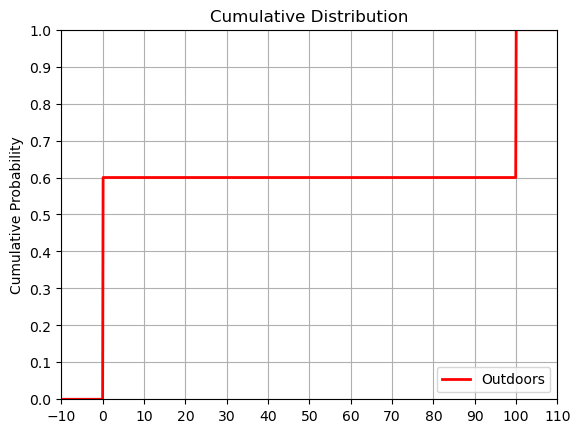

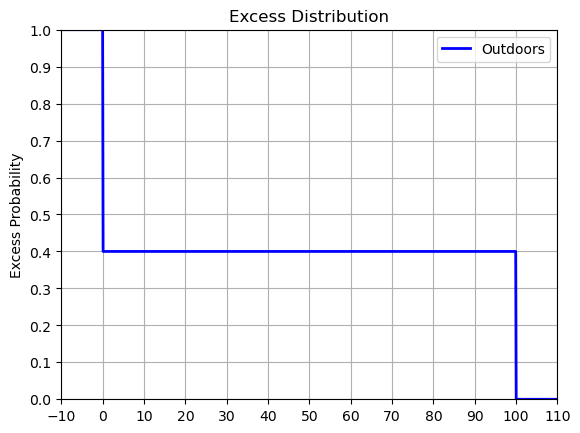

In [4]:
# Plot the 3 risk profiles individually
for deal in [ID, PR, OD]:
    print(f"\nRisk Profiles for {deal.name}:")
    deal.plot_CDF(plot_range, npoints, dpi=100)
    deal.plot_EPF(plot_range, npoints, dpi=100)


Risk Profiles for the Party Problem


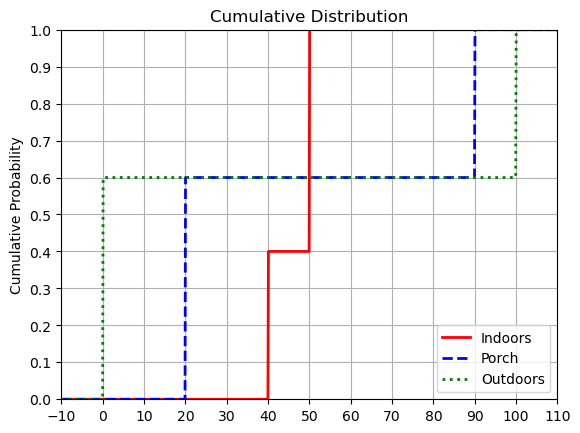

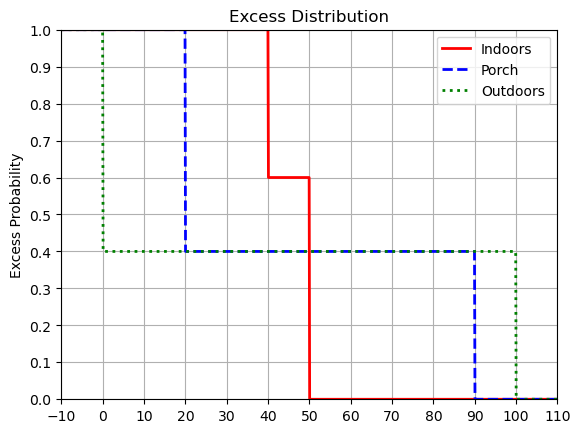

In [5]:
# Plot all the 3 risk profiles together for comparison
print("\nRisk Profiles for the Party Problem")
plot_risk_profiles([ID, PR, OD], plot_range, 
                   num=npoints, CDF=True, EPF=True, dpi=100)

In [6]:
# Check for 1SD using is1SD function
compare_range = plot_range[:-1]
npoints = 1000
print("\nChecking for 1st Order Stochastic Dominances:")
for A, B in [(ID, PR), (ID, OD), (PR, OD)]:
    if is1SD(A, B, compare_range, npoints): 
        print(f"  {A.name} 1SD {B.name}")
    else:            
        print(f"  {A.name} Does Not 1SD {B.name}")


Checking for 1st Order Stochastic Dominances:
  Indoors Does Not 1SD Porch
  Indoors Does Not 1SD Outdoors
  Porch Does Not 1SD Outdoors



Checking if Indoors 2SD Porch:


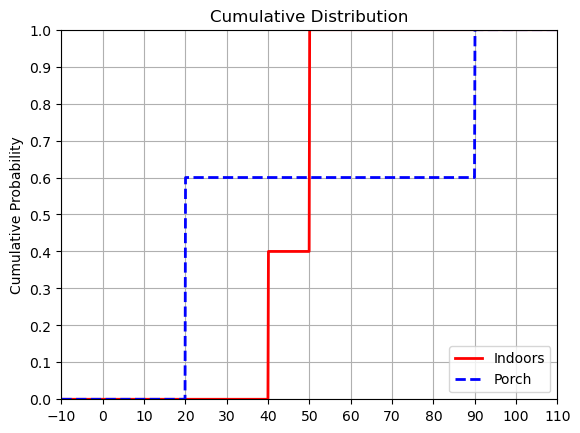

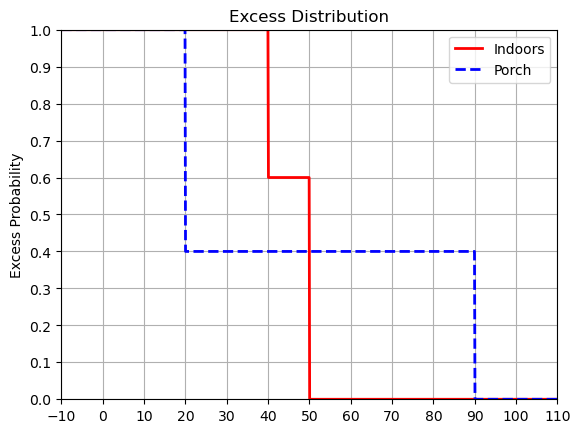

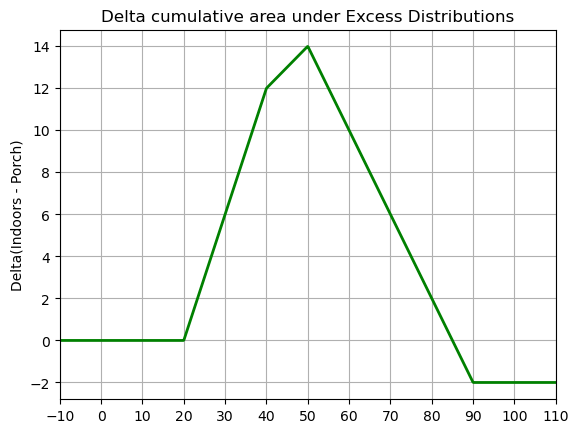


Indoors Does Not 2SD Porch

Checking if Indoors 2SD Outdoors:


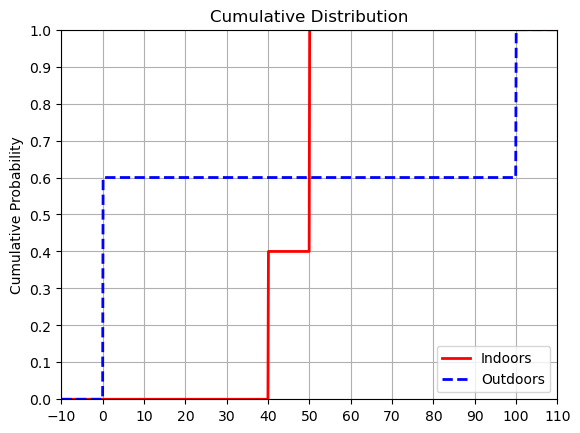

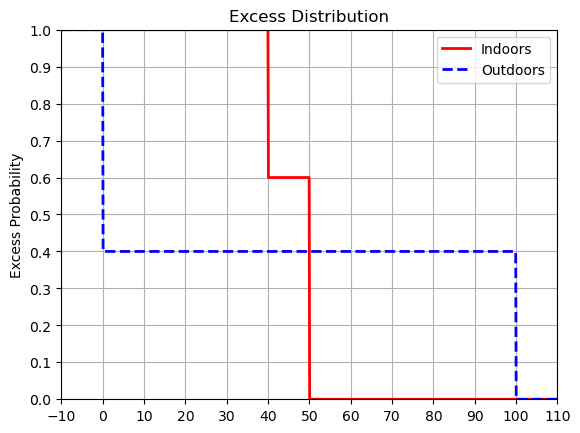

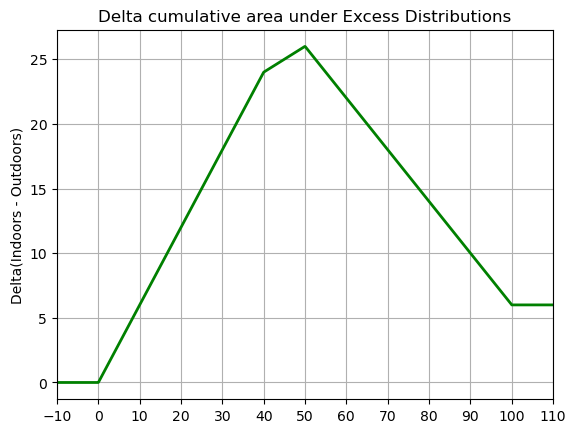


Indoors 2SD Outdoors

Checking if Porch 2SD Outdoors:


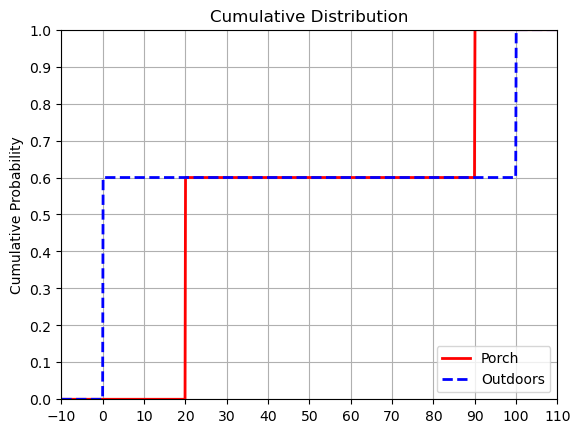

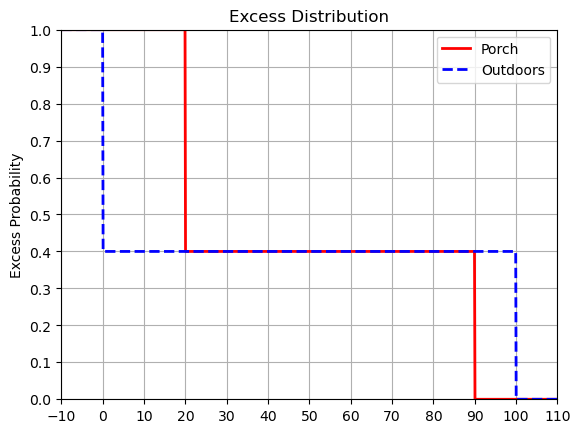

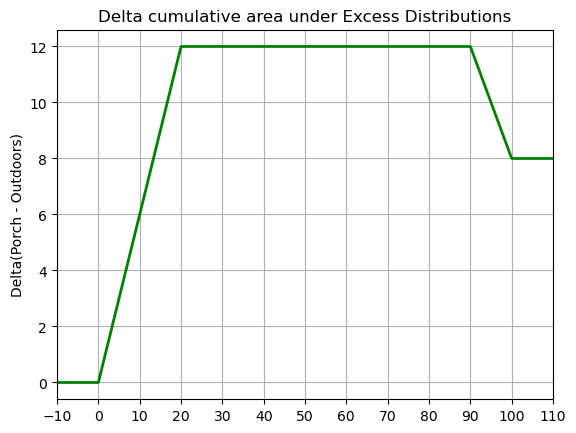


Porch 2SD Outdoors


In [7]:
# Check for 2SD using is2SD function
for A, B in [(ID, PR), (ID, OD), (PR, OD)]:
    print(f"\nChecking if {A.name} 2SD {B.name}:")
    if is2SD(A, B, plot_range, npoints, show_plot=True, dpi=100): 
        print(f"\n{A.name} 2SD {B.name}")
    else:            
        print(f"\n{A.name} Does Not 2SD {B.name}")